# <p style="text-align: center;"> <b> Đồ án Quan hóa Dữ liệu </b> </p>


---

# Mục lục

---

# Import thư viện cần thiết

In [32]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Đọc dữ liệu

In [2]:
df = pd.read_csv("data/hotel_bookings.csv")

# I. Data Understanding

## 1. Đếm số dòng và số cột

In [3]:
nrows, ncols = df.shape

print(f"Số dòng của tập dữ liệu: {nrows}")
print(f"Số cột của tập dữ liệu: {ncols}")

Số dòng của tập dữ liệu: 119390
Số cột của tập dữ liệu: 32


## 2. Viết bảng mô tả về các cột

Mỗi dòng trong bộ dữ liệu gồm thông tin về một lượt đặt phòng khách sạn. Các cột trong bảng dữ liệu được mô tả như sau:

| **Tên cột** | **Ý nghĩa** |
| --- | --- |
| **`hotel`** | Tên khách sạn (Resort Hotel hoặc City Hotel) |
| **`is_canceled`** | 1 nếu lượt đặt bị hủy, 0 nếu không |
| **`lead_time`** | Số ngày giữa ngày đặt phòng và ngày nhận phòng |
| **`arrival_date_year`** | Năm của ngày nhận phòng |
| **`arrival_date_month`** | Tháng của ngày nhận phòng |
| **`arrival_date_week_number`** | Số tuần trong năm của ngày nhận phòng |
| **`arrival_date_day_of_month`** | Ngày nhận phòng |
| **`stays_in_weekend_nights`** | Số đêm cuối tuần (Thứ 7 và Chủ Nhật) mà khách ở hoặc đặt phòng để ở |
| **`stays_in_week_nights`** | Số đêm trong tuần (từ Thứ 2 đến Thứ 6) mà khách ở hoặc đặt phòng để ở |
| **`adults`** | Số người lớn |
| **`children`** | Số trẻ em |
| **`babies`** | Số em bé |
| **`meal`** | Loại bữa ăn được đặt (Undefined/SC – không bao gồm bữa ăn, BB – Bữa sáng, HB – Bữa sáng và bữa tối, FB – Bữa sáng, bữa trưa và bữa tối) |
| **`country`** | Mã quốc gia của khách (dựa trên ISO 3155-3:2013) |
| **`market_segment`** | Phân khúc thị trường của khách hàng thuộc về (TA: Travel Agents, TO: Tour Operators) |
| **`distribution_channel`** | Kênh phân phối mà qua đó lượt đặt được thực hiện (TA: Travel Agents, TO: Tour Operators) |
| **`is_repeated_guest`** | 1 nếu khách đã từng đặt phòng trước đó, 0 nếu không |
| **`previous_cancellations`** | Số lần hủy đặt phòng trước đó của khách |
| **`previous_bookings_not_canceled`** | Số lần đặt phòng trước đó mà không bị hủy của khách |
| **`reserved_room_type`** | Mã loại phòng đã đặt |
| **`assigned_room_type`** | Mã loại phòng được gán cho lượt đặt |
| **`booking_changes`** | Số lần thay đổi thông tin đặt phòng trước khi nhận phòng hoặc trước khi hủy |
| **`deposit_type`** | Loại tiền đặt cọc đã đặt (No Deposit – không đặt cọc, Non Refund – đặt cọc không hoàn lại toàn bộ, Refundable – đặt cọc hoàn lại toàn bộ) |
| **`agent`** | ID của đại lý đặt phòng |
| **`company`** | ID của công ty (thực thể) đặt phòng hoặc trả tiền cho lượt đặt |
| **`days_in_waiting_list`** | Số ngày mà lượt đặt đã nằm trong danh sách chờ trước khi được xác nhận |
| **`customer_type`** | Loại đặt phòng (Contract, Group, Transient, Transient-Party) |
| **`adr`** | Tỉ lệ giá phòng mỗi đêm |
| **`required_car_parking_spaces`** | Số lượng chỗ đậu xe mà khách yêu cầu |
| **`total_of_special_requests`** | Số lượng yêu cầu đặc biệt từ khách |
| **`reservation_status`** | Trạng thái cuối cùng của lượt đặt (Canceled, Check-Out, No-Show) |
| **`reservation_status_date`** | Ngày cuối cùng mà trạng thái cuối cùng được cập nhật |

## 3. Lấy 5 điểm dữ liệu ra làm mẫu

### 3. Lấy 5 điểm dữ liệu ra làm mẫu


In [4]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
11237,Resort Hotel,1,172,2017,April,17,29,2,5,2,...,No Deposit,314.0,NaN,0,Transient,86.91,0,0,Canceled,12/27/2016
36210,Resort Hotel,0,82,2017,May,19,12,0,2,2,...,No Deposit,9.0,NaN,0,Transient,102.00,0,2,Check-Out,5/14/2017
56151,City Hotel,1,36,2016,August,36,30,0,4,2,...,No Deposit,9.0,NaN,0,Transient,109.80,0,0,Canceled,7/26/2016
93269,City Hotel,0,32,2016,July,30,18,1,1,1,...,No Deposit,39.0,NaN,0,Transient-Party,85.00,0,0,Check-Out,7/20/2016
87277,City Hotel,0,122,2016,April,16,15,0,2,2,...,No Deposit,151.0,NaN,56,Transient-Party,85.00,0,0,Check-Out,4/17/2016


## 4. Phân tích tỷ lệ missing rate

### Tỷ lệ missing rate của các cột trong bộ dữ liệu

In [5]:
missing_rates = df.isna().sum() / len(df) * 100
missing_rates_df = pd.DataFrame({'Tên cột': missing_rates.index, 'Tỉ lệ thiếu dữ liệu (%)': missing_rates.values})
missing_rates_df = missing_rates_df.sort_values(by="Tỉ lệ thiếu dữ liệu (%)", ascending=False)
missing_rates_df.style.background_gradient(cmap='Reds', subset=['Tỉ lệ thiếu dữ liệu (%)'])
# missing_rates_df.style.bar(subset=['Tỉ lệ thiếu dữ liệu (%)'], color='#d65f5f')

,Tên cột,Tỉ lệ thiếu dữ liệu (%)
24,company,94.306893
23,agent,13.686238
13,country,0.408744
10,children,0.003350
19,reserved_room_type,0.000000
20,assigned_room_type,0.000000
21,booking_changes,0.000000
22,deposit_type,0.000000
0,hotel,0.000000
17,previous_cancellations,0.000000


### Tỷ lệ missing rate của các dòng trong bộ dữ liệu

### 5. Phân tích tỷ lệ duplicate.

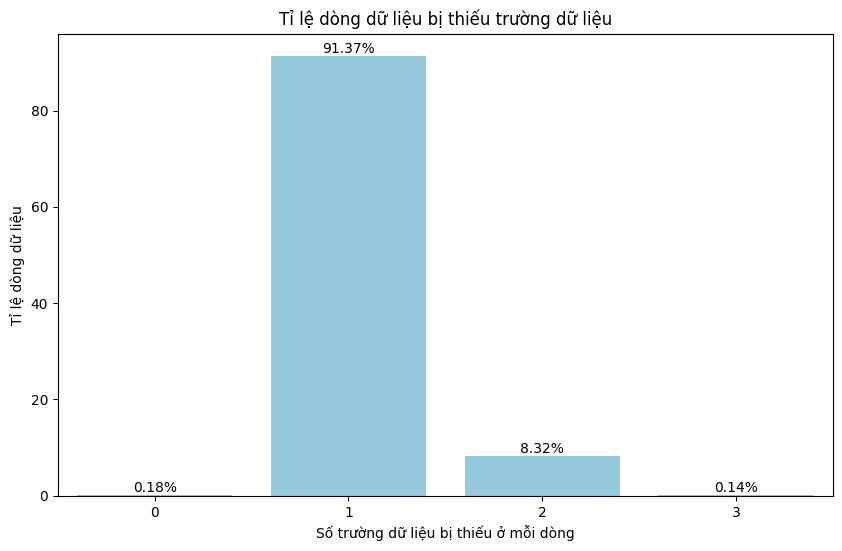

In [6]:
missing_rates_rows = df.isna().sum(axis=1)
missing_rates_rows = missing_rates_rows.value_counts().sort_index() / len(df) * 100
# ghi số lên biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_rates_rows.index, y=missing_rates_rows.values, color='skyblue')
plt.xlabel('Số trường dữ liệu bị thiếu ở mỗi dòng')
plt.ylabel('Tỉ lệ dòng dữ liệu')
plt.title('Tỉ lệ dòng dữ liệu bị thiếu trường dữ liệu')
for i in range(len(missing_rates_rows)):
    plt.text(i, missing_rates_rows.values[i], f'{missing_rates_rows.values[i]:.2f}%', ha='center', va='bottom')
plt.show()

## 5. Phân tích tỷ lệ duplicate

In [7]:
duplicate_rate = df.duplicated().sum() / len(df)
print(f"Tỷ lệ dòng dữ liệu bị trùng lặp là: {round(duplicate_rate, 4) * 100}%")

# Loại bỏ các dòng trùng lặp
df = df.drop_duplicates()
print(f"Số dòng dữ liệu sau khi loại bỏ trùng lặp: {len(df)}")

Tỷ lệ dòng dữ liệu bị trùng lặp là: 26.8%
Số dòng dữ liệu sau khi loại bỏ trùng lặp: 87396


## 6. Fill missing rate

### 6. Fill missing rate


In [8]:
df = df.fillna(-1)

# II. EDA 1D 

### 1. Chia loại dữ liệu numerical hoặc categorical

In [8]:
## 1. Chia loại dữ liệu numeric hoặc categorical

In [9]:
cate_list = list(df.dtypes[df.dtypes == 'object'].index)
num_list = list(df.dtypes[df.dtypes != 'object'].index)

### Dữ liệu Numerical 

#### Thống kê mô tả các cột numerical

In [28]:
df[num_list].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,"87,396.000000","87,396.000000","87,396.000000","87,396.000000","87,396.000000","87,396.000000","87,396.000000","87,396.000000","87,396.000000","87,396.000000","87,396.000000","87,396.000000","87,396.000000","87,396.000000","87,396.000000","87,396.000000","87,396.000000","87,396.000000","87,396.000000","87,396.000000"
mean,0.274898,79.891368,"2,016.210296",26.838334,15.815541,1.005263,2.625395,1.875795,0.138588,0.010824,0.039075,0.030413,0.183990,0.271603,80.865143,10.076983,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455936,0.113597,0.193775,0.369145,1.731894,0.727245,110.048927,54.239239,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,"2,015.000000",1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,"2,016.000000",16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,"2,016.000000",27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,"2,017.000000",37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,-1.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,"2,017.000000",53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,"5,400.000000",8.000000,5.000000


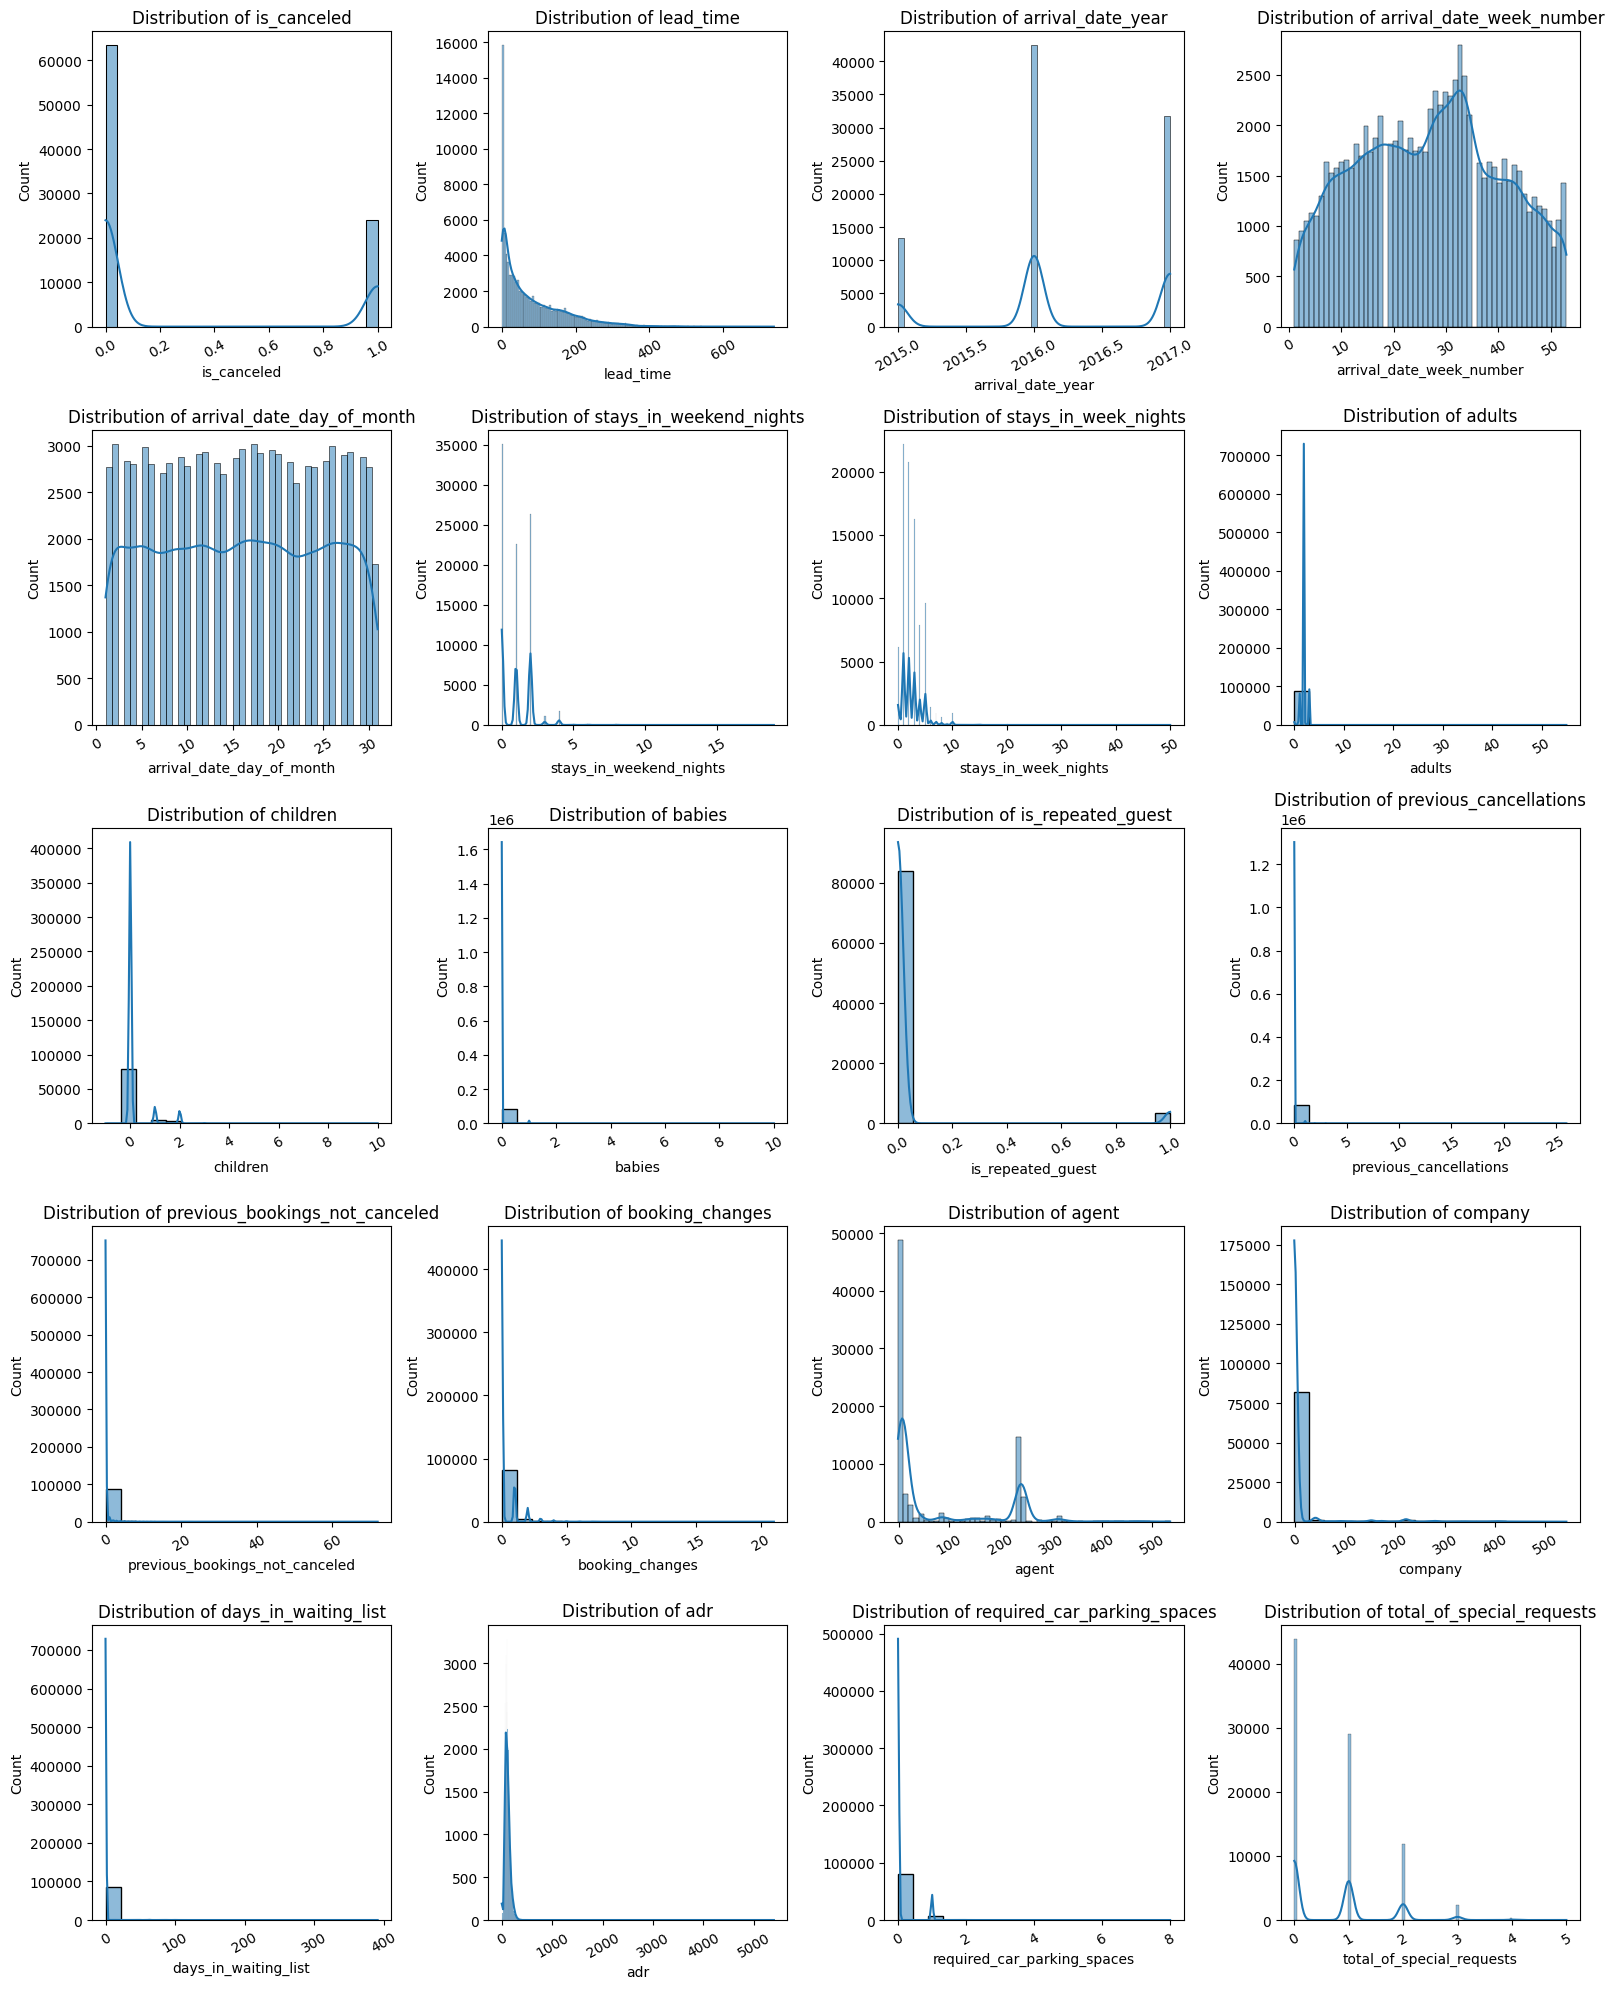

In [42]:
num_num_cols = len(num_list)
num_rows = num_num_cols // 4 + (1 if num_num_cols % 4 != 0 else 0)

plt.figure(figsize=(16, 4 * num_rows))
for i, col in enumerate(num_list, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

In [10]:
df[num_list[0]].value_counts(normalize=True)

is_canceled
0    0.725102
1    0.274898
Name: proportion, dtype: float64

In [11]:
df[num_list[1]].value_counts(normalize=True)

lead_time
0      0.068401
1      0.036798
2      0.022049
3      0.019497
4      0.017964
         ...   
410    0.000011
411    0.000011
371    0.000011
532    0.000011
463    0.000011
Name: proportion, Length: 479, dtype: float64

In [12]:
pd.options.display.float_format = '{:,.6f}'.format
percentiles = [0.01] + [0.05*x for x in range(1, 20)] + [0.99]

In [13]:
df[num_list[1]].describe(percentiles=percentiles)

count   87,396.000000
mean        79.891368
std         86.052325
min          0.000000
1%           0.000000
5%           0.000000
10%          1.000000
15%          4.000000
20%          7.000000
25%         11.000000
30%         17.000000
35%         23.000000
40%         31.000000
45%         39.000000
50%         49.000000
55%         61.000000
60%         73.000000
65%         88.000000
70%        105.000000
75%        125.000000
80%        148.000000
85%        172.000000
90%        204.000000
95%        256.000000
99%        347.000000
max        737.000000
Name: lead_time, dtype: float64

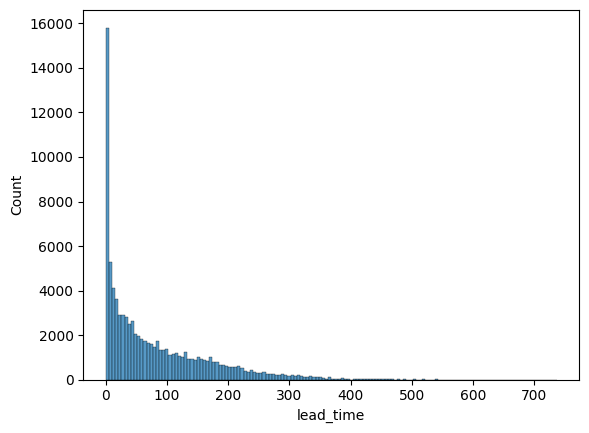

In [43]:
ax = sns.histplot(df[num_list[1]])

## Dữ liệu Categorical
 

#### Thống kê mô tả các cột categorical

In [39]:
df[cate_list].describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396
unique,2,12,5,178,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2/14/2016
freq,53428,11257,67978,27453,51618,69141,56552,46313,86251,71986,63371,211


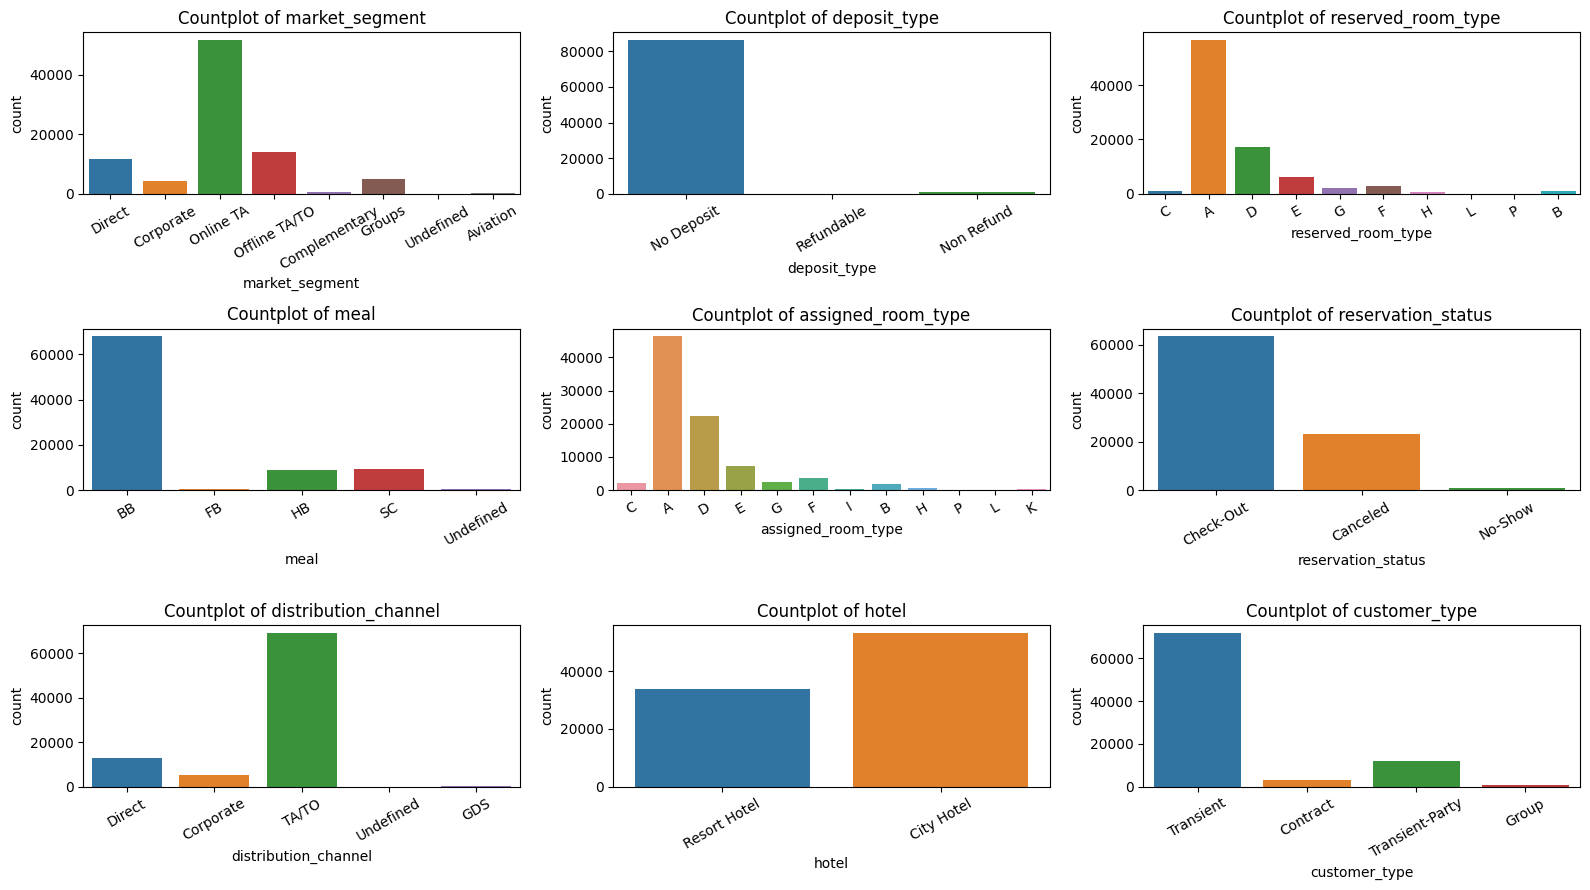

In [38]:

cate_cols_plot = list(set(cate_list) - set(['country', 'arrival_date_month', 'reservation_status_date']))
num_cate_cols = len(cate_cols_plot)
num_rows = num_cate_cols // 3 + (1 if num_cate_cols % 3 != 0 else 0)

plt.figure(figsize=(16, 3 * num_rows))
for i, col in enumerate(cate_cols_plot, 1):
        plt.subplot(num_rows, 3, i)
        sns.countplot(x=col, data=df)
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

In [15]:
df[cate_list[0]].value_counts(normalize=True)

hotel
City Hotel     0.611332
Resort Hotel   0.388668
Name: proportion, dtype: float64

In [16]:
df[cate_list[1]].value_counts(normalize=True)

arrival_date_month
August      0.128805
July        0.115074
May         0.095599
April       0.090485
June        0.088848
March       0.085965
October     0.079340
September   0.076548
February    0.069774
December    0.058710
November    0.057154
January     0.053698
Name: proportion, dtype: float64

# II. EDA 2D 

## 1. Phân tích hệ số tương quan giữa các biến numeric

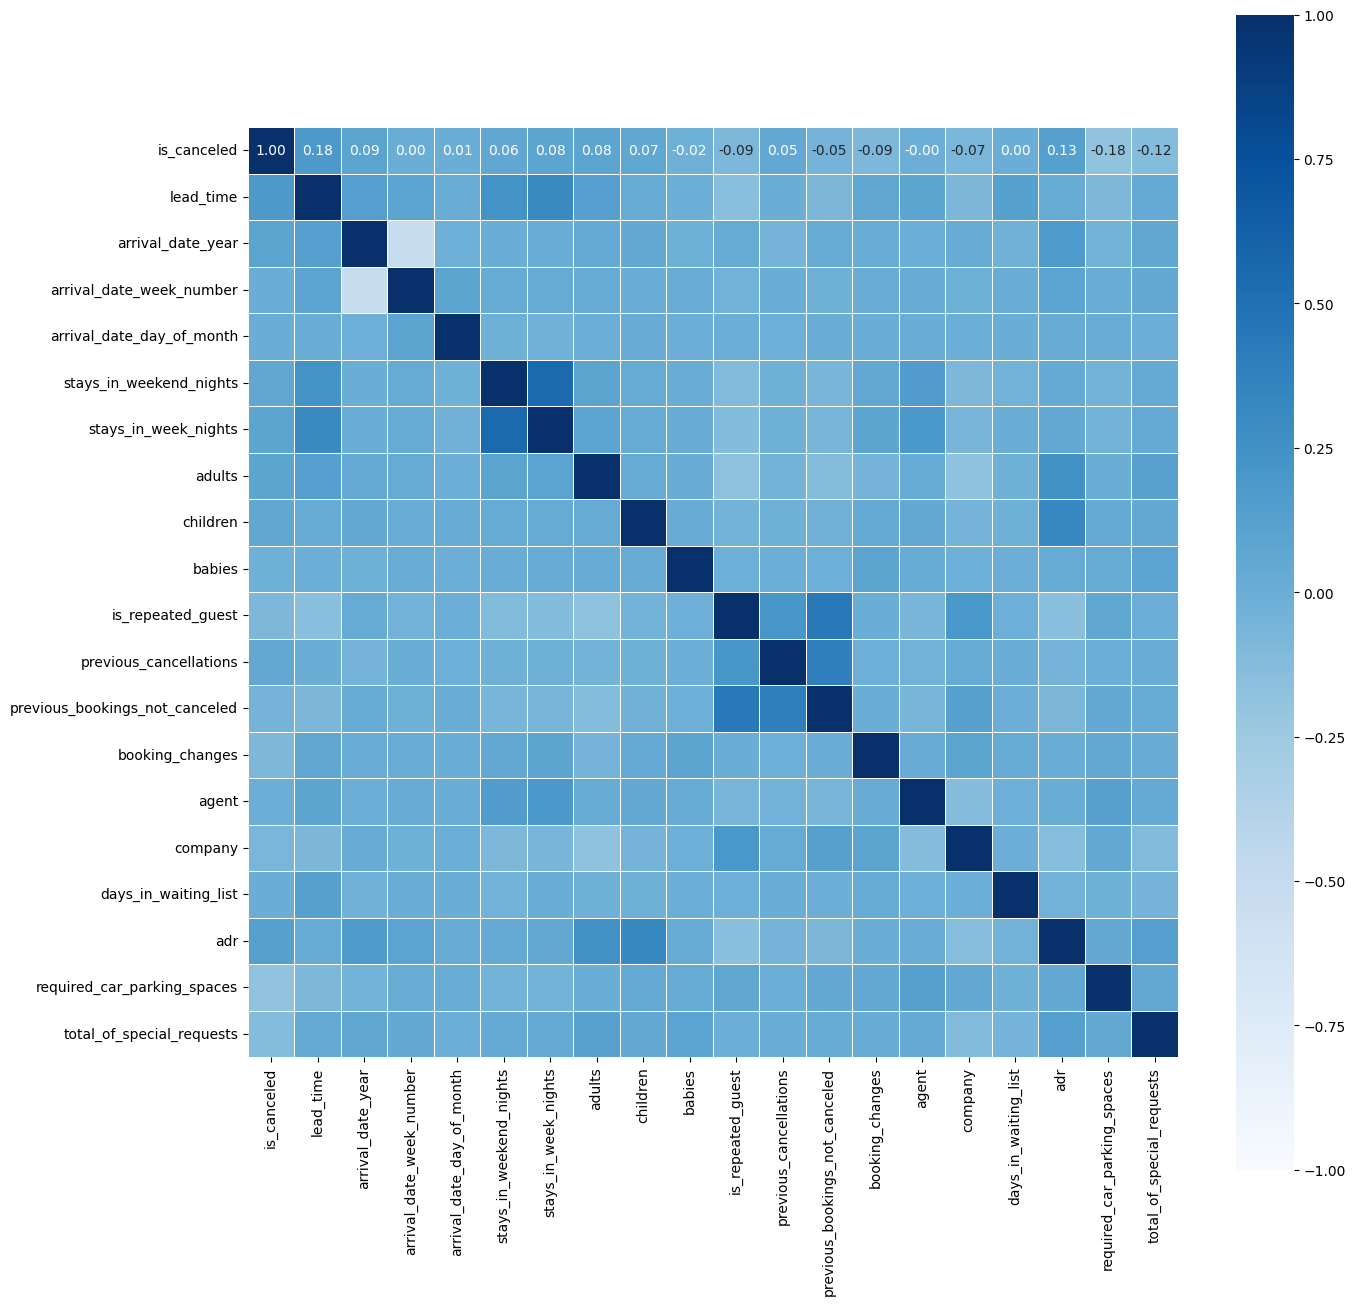

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df[num_list].corr(), annot=True, fmt=".2f", linewidths=.5, square = True, cmap="Blues", vmin=-1, vmax=1)
plt.show()

In [18]:
num_list[12]

'previous_bookings_not_canceled'

e:\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


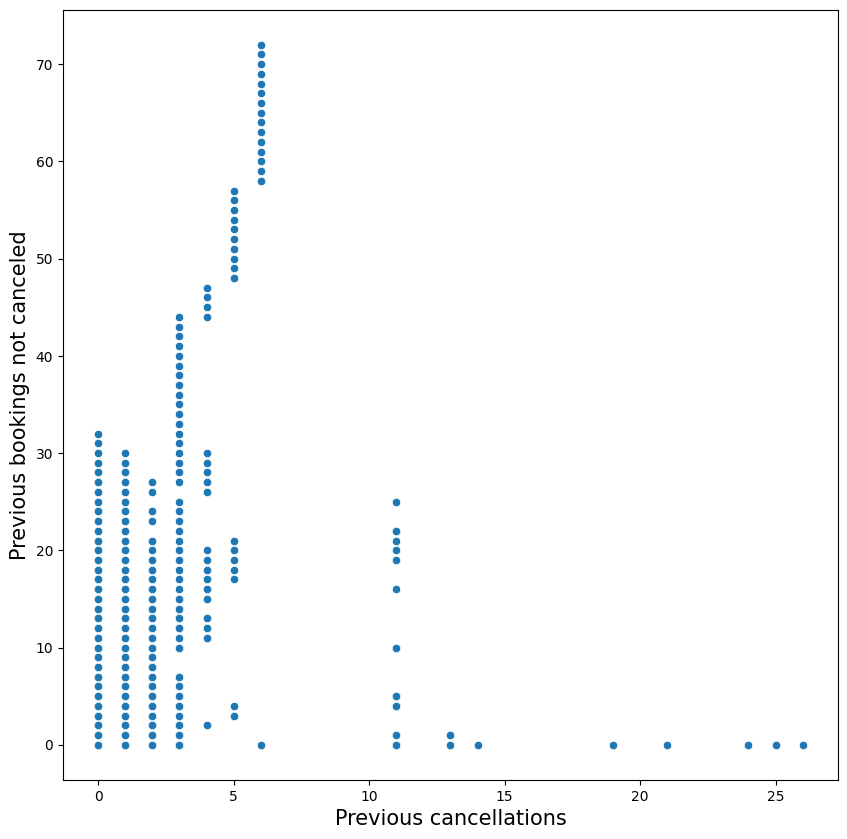

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=df, x="previous_cancellations", y="previous_bookings_not_canceled")
plt.xlabel('Previous cancellations', size = 15)
plt.ylabel('Previous bookings not canceled', size = 15)
plt.show()

In [20]:
df.groupby([cate_list[0]]).agg({num_list[2]: ['min', 'mean', 'std', 'max']})

arrival_date_year                            
                           min         mean      std   max
hotel                                                     
City Hotel                2015 2,016.253968 0.659292  2017
Resort Hotel              2015 2,016.141604 0.720948  2017

In [21]:
df.groupby([cate_list[0], cate_list[1]]).agg({cate_list[2]: 'count'})/len(df)

meal
hotel        arrival_date_month         
City Hotel   April              0.058126
             August             0.075415
             December           0.034487
             February           0.041249
             January            0.031237
             July               0.065724
             June               0.057268
             March              0.055563
             May                0.061936
             November           0.033663
             October            0.048149
             September          0.048515
Resort Hotel April              0.032358
             August             0.053389
             December           0.024223
             February           0.028525
             January            0.022461
             July               0.049350
             June               0.031580
             March              0.030402
             May                0.033663
             November           0.023491
             October            0.031191
             September          0.028033

In [22]:
df.groupby([cate_list[0], cate_list[2]]).agg({cate_list[2]: 'count'})/len(df)

meal
hotel        meal              
City Hotel   BB        0.471749
             FB        0.000126
             HB        0.031935
             SC        0.107522
Resort Hotel BB        0.306067
             FB        0.003993
             HB        0.072017
             SC        0.000961
             Undefined 0.005630

# EDA 3D 

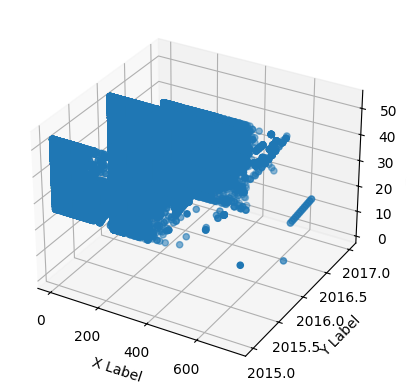

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df[num_list[1]], df[num_list[2]], df[num_list[3]])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

e:\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

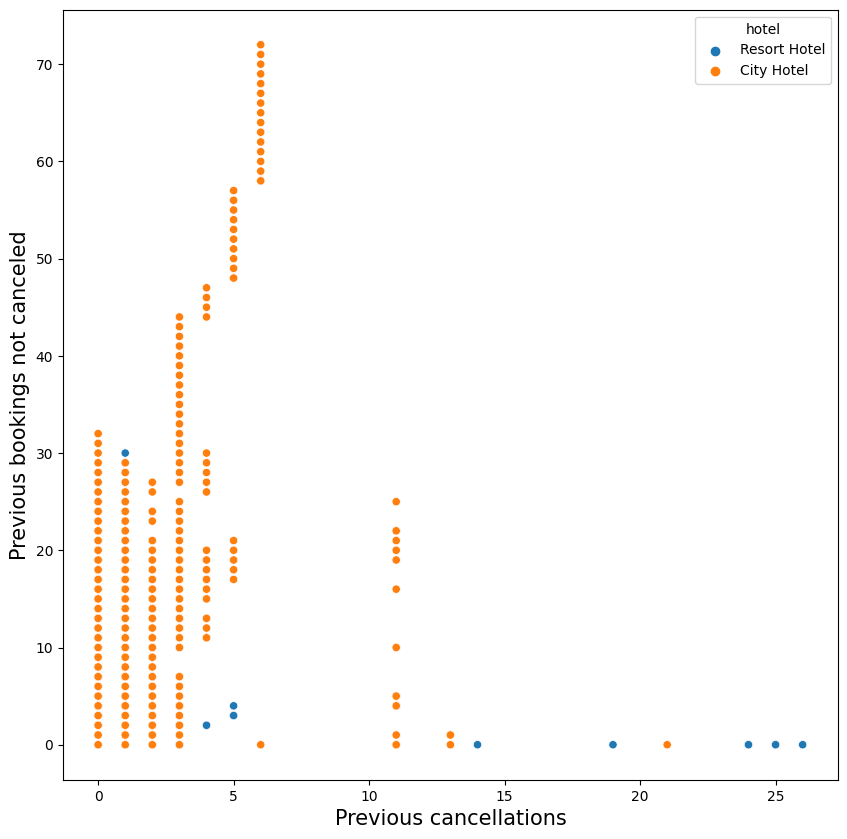

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=df, x="previous_cancellations", y="previous_bookings_not_canceled", hue=cate_list[0])
plt.xlabel('Previous cancellations', size = 15)
plt.ylabel('Previous bookings not canceled', size = 15)
plt.show()

In [25]:
df.groupby(cate_list[0]).agg({num_list[1]: ['min', 'mean', 'std', 'max'], num_list[2]: ['min', 'mean', 'std', 'max']})

lead_time                          arrival_date_year  \
                   min      mean       std  max               min   
hotel                                                               
City Hotel           0 77.678521 82.113381  629              2015   
Resort Hotel         0 83.371938 91.800279  737              2015   

                                          
                     mean      std   max  
hotel                                     
City Hotel   2,016.253968 0.659292  2017  
Resort Hotel 2,016.141604 0.720948  2017

# Insight 

* previous cancellations tương quan thuận với previous bookings not canceled
* Trung bình previous cancellations của City Hotel cao hơn trung bình previous cancellations của Resort Hotel  